# Spiking network

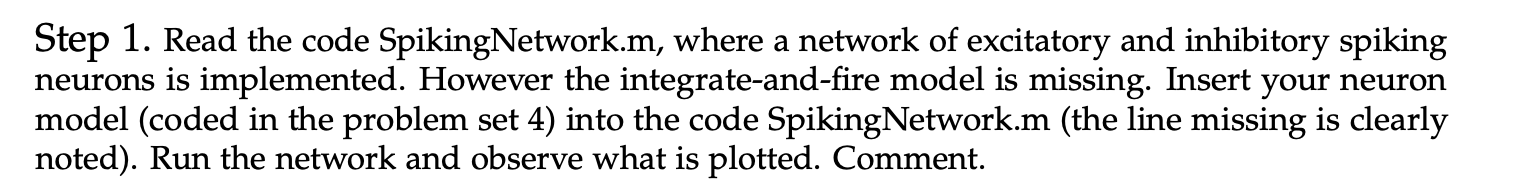

    
    v= v+ dt./tau_m.*(-g_m*v+Itot); % IF neuron model


In [1]:
import numpy as np
import math

In [ ]:
## Defining network model parameters
vt = 1;                     % Spiking threshold
tau_m = 10;                 % Membrane time constant [ms]
g_m = 1;                    % Neuron conductance
Nsig = 1.0;                 % Variance amplitude of current
Nmean = 0.0;                % Mean current to neurons
tau_I = 10;                 % Time constant to filter the synaptic inputs
N = 5000;                   % Number of neurons in total
NE = 0.5*N;                 % Number of excitatory neurons
NI = 0.5*N;                 % Number of inhibitory neurons
dt = 1;                     % Simulation time bin [ms]
T = 300/dt;                 % Simulation length 
W = 100/N;                  % Connectivity strength


In [ ]:
##Use this for step 6 
# W = 2/sqrt(N);               % Connectivity strength


In [ ]:

v = rand(N,1)*vt;           % membrane potential
vv = np.zeros(N,1);            % variable that notes if v crosses the threshold
Iback = zeros(N,1);         % building up the external current
SP = 0;                     % recording spike times
Ichem = zeros(N,1);         % current coming from synaptic inputs
Iext = zeros(N,1);          % external current
raster = [];                % save spike times for plotting
sample_syn_current = zeros(1,T);  % save the synaptic current of a sample neuron


In [ ]:
for t in range(T):  #loop over time
    Iback = Iback + dt/tau_I*(-Iback +randn(N,1));          % generate a colored noise for the current
    Iext = Iback/sqrt(1/(2*(tau_I/dt)))*Nsig+Nmean;         % rescaling the noise current to have the correct mean and variance

    Ichem(1:NE) = Ichem(1:NE) + dt/tau_I*(-Ichem(1:NE) + W*(sum(vv(1:NE))-vv(1:NE))-W*(sum(vv(NE+1:end)))); % current to excitatory neurons coming from the synaptic inputs
    Ichem(NE+1:end) = Ichem(NE+1:end) + dt/tau_I*(-Ichem(NE+1:end) -W*(sum(vv(NE+1:end))-vv(NE+1:end))+W*(sum(vv(1:NE)))); % current to inhibitory neurons coming from the synaptic inputs
    Itot = Iext+Ichem;